In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from bokeh.plotting import figure, output_file, show
import tweepy
# Twitter API keys
from config import (consumer_key, consumer_secret,
                    access_token, access_token_secret)

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API auth
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Get one big list of tweets
def get_tweets(user, pages=5):
    tweets = []
    for x in range(1, pages + 1):
        public_tweets = api.user_timeline(user, page=x)
        tweets.extend(public_tweets)
    return tweets

# Can add multiple scatters to the same plot
def plot_sentiments(sentiments, color):
    sentiment_df = pd.DataFrame(sentiments)
    plt.scatter(sentiment_df.index.values, sentiment_df[0], color=color)

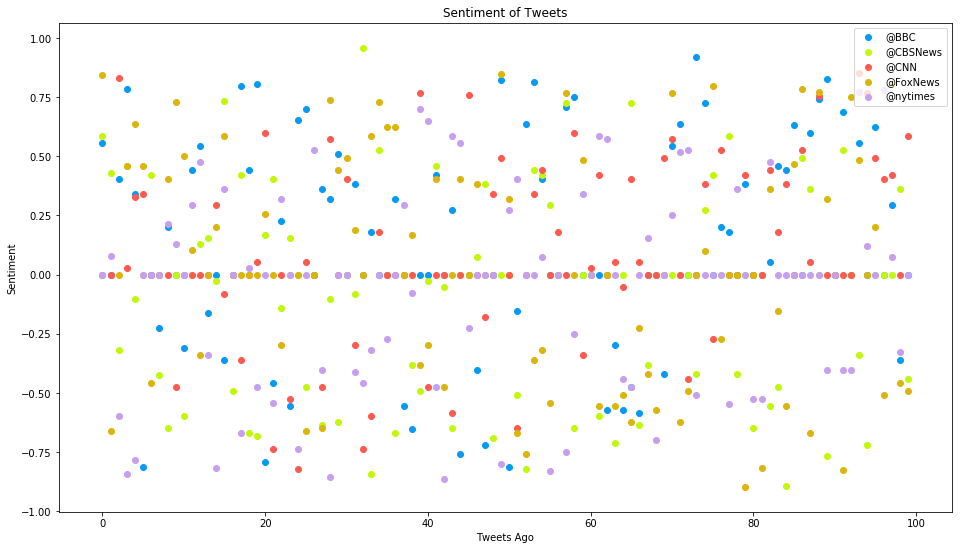

In [4]:
target_users = ['@BBC', '@CBSNews', '@CNN', '@FoxNews', '@nytimes']
colors = ['xkcd:azure', 'xkcd:chartreuse', 'xkcd:coral', 'xkcd:gold', 'xkcd:lavender']

# Adjusting figure size keeps legend from obscuring (most) data points
plt.figure(figsize=(16, 9))

# Use enumerate to get index of the color we want
for i, user in enumerate(target_users):
    sentiments = []
    tweets = get_tweets(user)

    # Loop through all tweets
    for tweet in tweets:
        # Run Vader Analysis on each tweet
        result = analyzer.polarity_scores(tweet['text'])
        sentiments.append(result['compound'])

    plot_sentiments(sentiments, colors[i])

plt.legend(target_users, loc=1)
plt.title('Sentiment of Tweets')
plt.xlabel('Tweets Ago')
plt.ylabel('Sentiment')
plt.show()